# The Singular Value Decomposition

$A = U \Sigma V^T$

$U,V$ orthonormal, $\Sigma$ diagonal with positive entries.

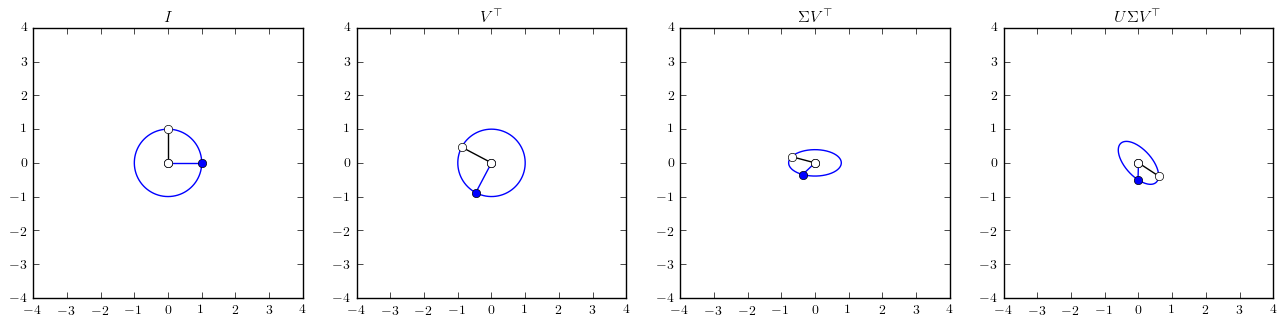

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

from notes_utilities import pnorm_ball_points
from notes_utilities import bmatrix

np.set_printoptions(precision=3, suppress=True)


rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(1,4,1)
ax2 = plt.subplot(1,4,2)
ax3 = plt.subplot(1,4,3)
ax4 = plt.subplot(1,4,4)

dx,dy = pnorm_ball_points()
X = np.c_[dx,dy].T
B = np.c_[np.zeros((2,1)), np.eye(2)]

ln_domain_ball = plt.Line2D(dx,dy,markeredgecolor='k', linewidth=1, color='b')
ln_e1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_e2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax1.add_line(ln_domain_ball)
ax1.add_line(ln_e1)
ax1.add_line(ln_e2)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.set_title('$I$')

A = np.random.randn(2,2)
U,S,V=np.linalg.svd(A)

X = V.dot(X)
B = V.dot(B)
ln_VTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_VTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_VTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax2.add_line(ln_VTx)
ax2.add_line(ln_VTe1)
ax2.add_line(ln_VTe2)

ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.set_title('$V^\\top$')

S = np.diag(S)
X = S.dot(X)
B = S.dot(B)
ln_SVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_SVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_SVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax3.add_line(ln_SVTx)
ax3.add_line(ln_SVTe1)
ax3.add_line(ln_SVTe2)

ax3.set_xlim([-4,4])
ax3.set_ylim([-4,4])
ax3.set_aspect('equal')
ax3.set_title(r'$\Sigma V^\top$')

X = U.dot(X)
B = U.dot(B)
ln_USVTx = plt.Line2D(X[0,:],X[1,:],markeredgecolor='k', linewidth=1, color='b')
ln_USVTe1 = plt.Line2D(B[0,[0,1]],B[1,[0,1]],markeredgecolor='k', marker='o', color='b')
ln_USVTe2 = plt.Line2D(B[0,[0,2]],B[1,[0,2]],markeredgecolor='k', markerfacecolor='w', marker='o', color='k')

ax4.add_line(ln_USVTx)
ax4.add_line(ln_USVTe1)
ax4.add_line(ln_USVTe2)

ax4.set_xlim([-4,4])
ax4.set_ylim([-4,4])
ax4.set_aspect('equal')
ax4.set_title(r'$U \Sigma V^\top$')

plt.show()




In [39]:
a = np.Inf

print(a is np.infty)

True


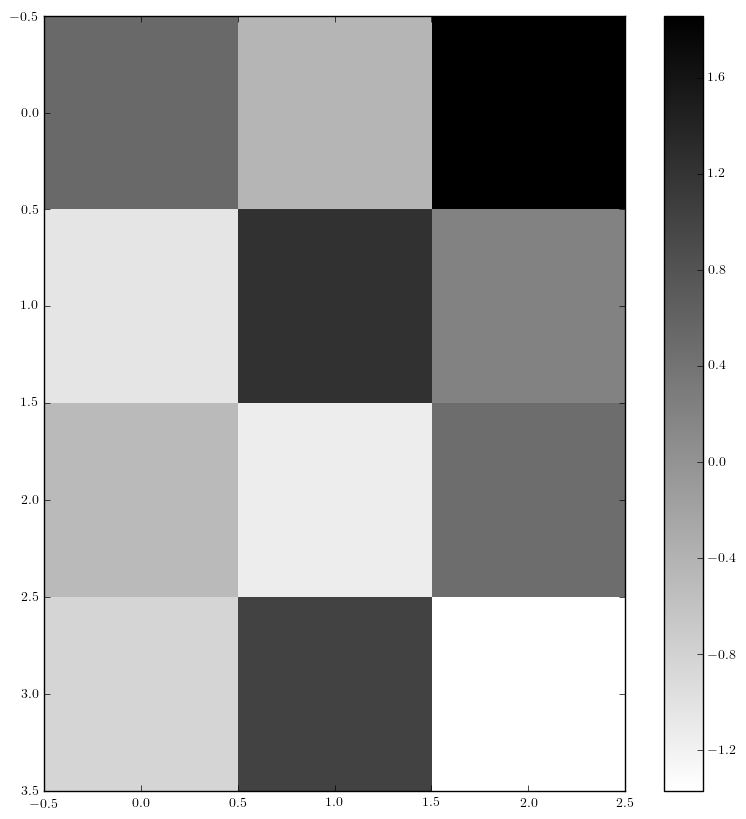

U
[[-0.625 -0.517 -0.142  0.568]
 [ 0.318 -0.841  0.261 -0.351]
 [-0.281  0.158  0.944  0.07 ]
 [ 0.656 -0.017  0.143  0.741]]
S
[ 2.885  1.542  1.079]
V
[[-0.365  0.568 -0.738]
 [ 0.349 -0.651 -0.674]
 [-0.863 -0.504  0.039]]
A
[[ 0.51  -0.428  1.861]
 [-1.031  1.223  0.208]
 [-0.499 -1.132  0.473]
 [-0.832  1.014 -1.371]]
A2
[[ 0.379 -0.505  1.867]
 [-0.788  1.365  0.197]
 [ 0.381 -0.619  0.434]
 [-0.699  1.092 -1.377]]


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.linalg as la

M = 4
N = 3
A = np.random.randn(M, N)

plt.figure(figsize=(10,10))
plt.imshow(A, interpolation='nearest', cmap='gray_r')
plt.colorbar()
plt.show()

U,S,Vt = la.svd(A)

print('U')
print(U)

print('S')
print(S)

print('V')
print(Vt)

rnk = 2

Sr = np.zeros_like(S)

Sr[0:rnk] = S[0:rnk]
Sig = la.diagsvd(Sr, M, N)

A2 = np.dot(np.dot(U, Sig), Vt)

print('A')
print(A)

print('A2')
print(A2)




$\|x\|$

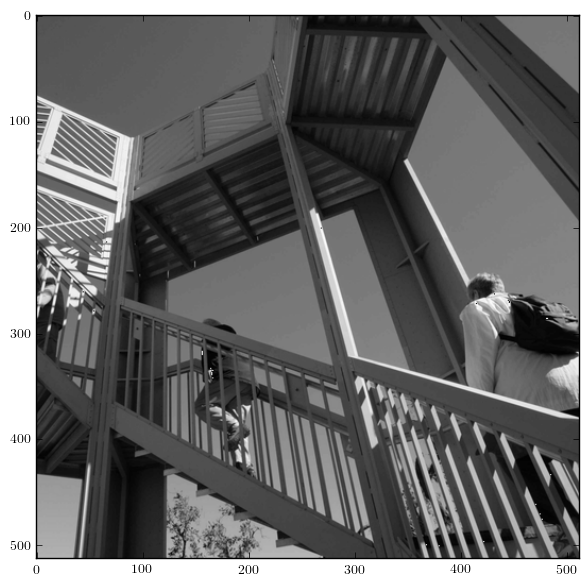

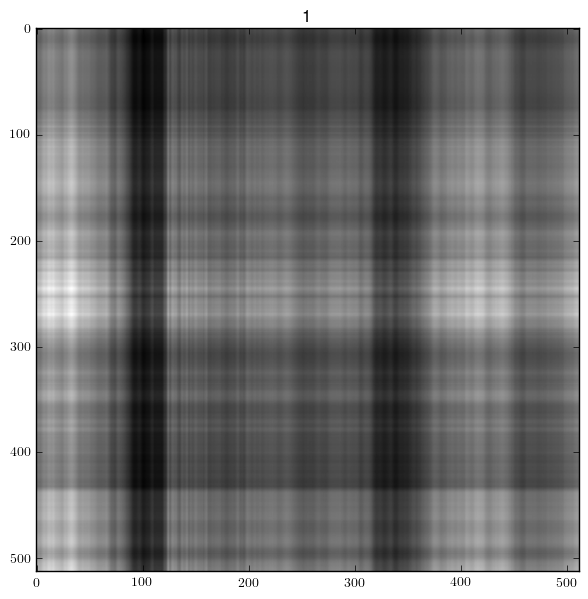

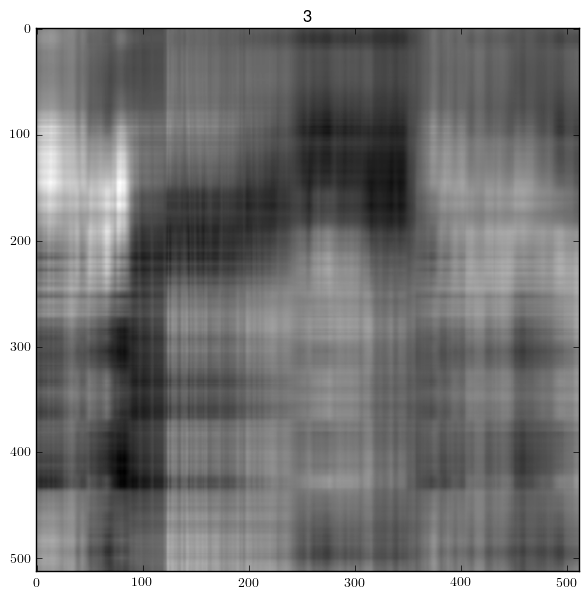

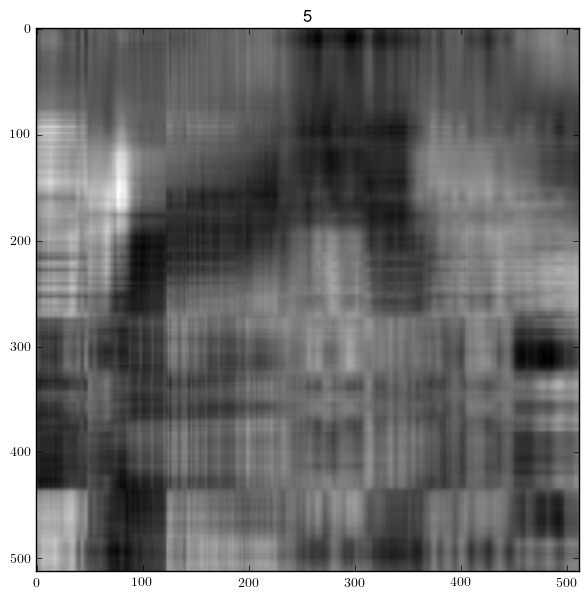

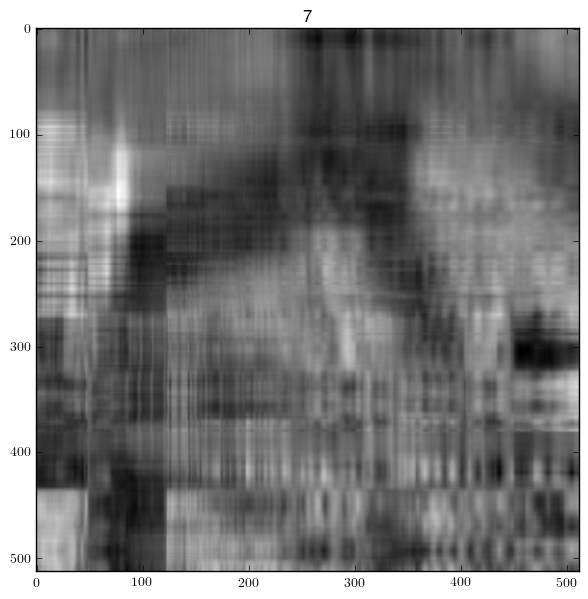

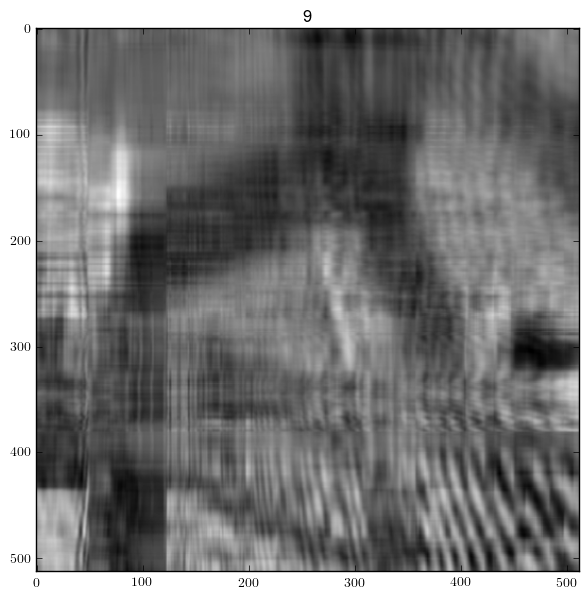

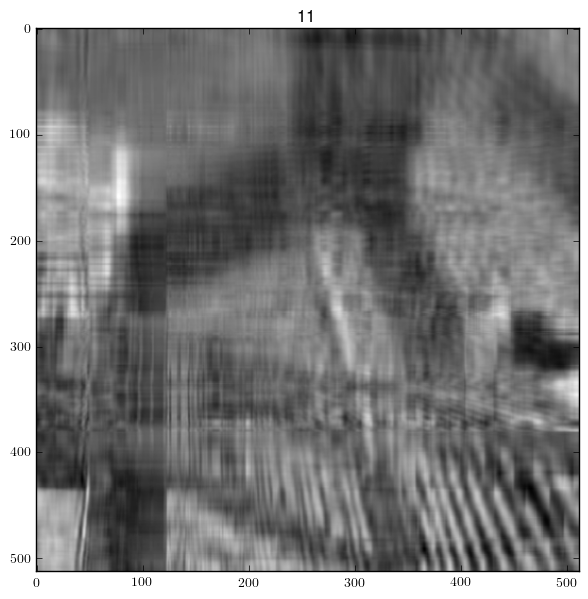

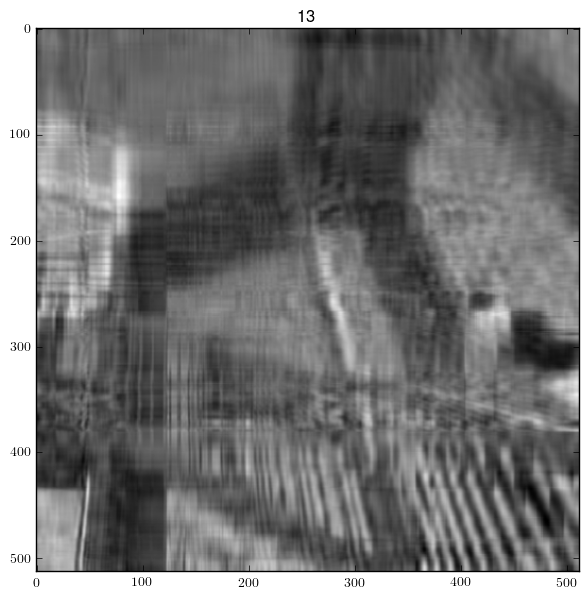

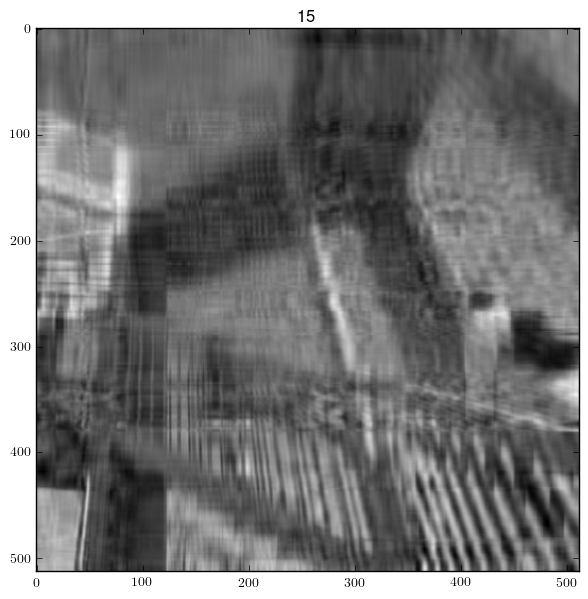

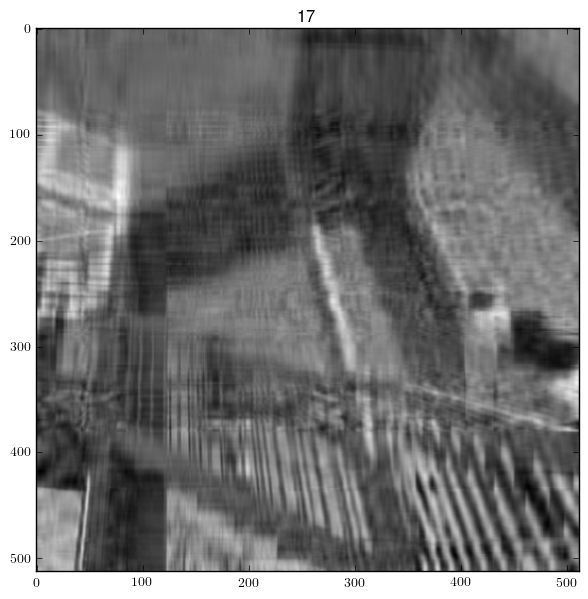

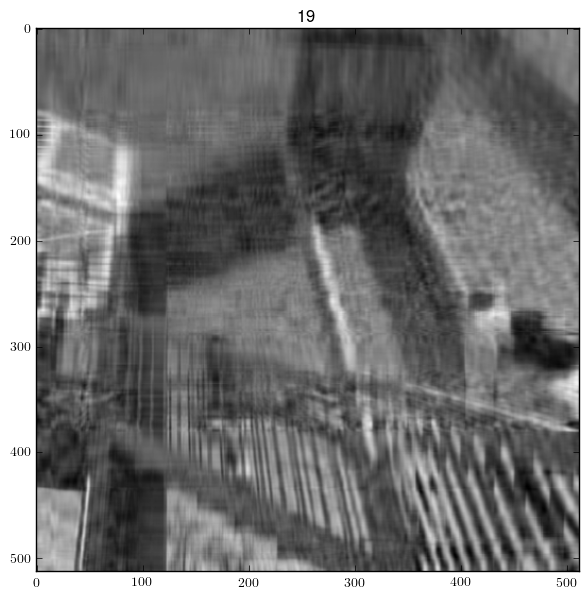

In [7]:
import scipy as sc
import scipy.misc

X = scipy.misc.ascent()

fig = plt.figure(figsize=(7,7))
plt.gray()
plt.imshow(X)
plt.show()

U,S,Vt = la.svd(X)

M,N = X.shape

for rnk in range(1,20,2):

    Sr = np.zeros_like(S)

    Sr[0:rnk] = S[0:rnk]
    Sig = la.diagsvd(Sr, M, N)

    A2 = np.dot(np.dot(U, Sig), Vt)

    fig = plt.figure(figsize=(7,7))
    plt.gray()
    plt.imshow(A2)
    plt.title(rnk)
    plt.show()


In [20]:
str(t2)

'<TABLE cellpadding="4" width="100%" style="border: 1px solid #000000; border-collapse: collapse;" border="1">\n  <COL width="">\n  <COL width="75%">\n <TR>\n  <TH>col1</TH>\n  <TH>col2</TH>\n </TR>\n <TR>\n  <TD>1</TD>\n  <TD>2</TD>\n </TR>\n <TR>\n  <TD>3</TD>\n  <TD bgcolor="red">new</TD>\n </TR>\n <TR>\n  <TD>5</TD>\n  <TD>6</TD>\n </TR>\n <TR align="center">\n  <TD>7</TD>\n  <TD>8</TD>\n </TR>\n</TABLE>'